In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\Amber Camilleri\.conda\envs\ipykernel_py2\Library\share'

# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
from pandas import Series, DataFrame
from mpl_toolkits.basemap import Basemap
my_dpi=96

# By Each Year

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


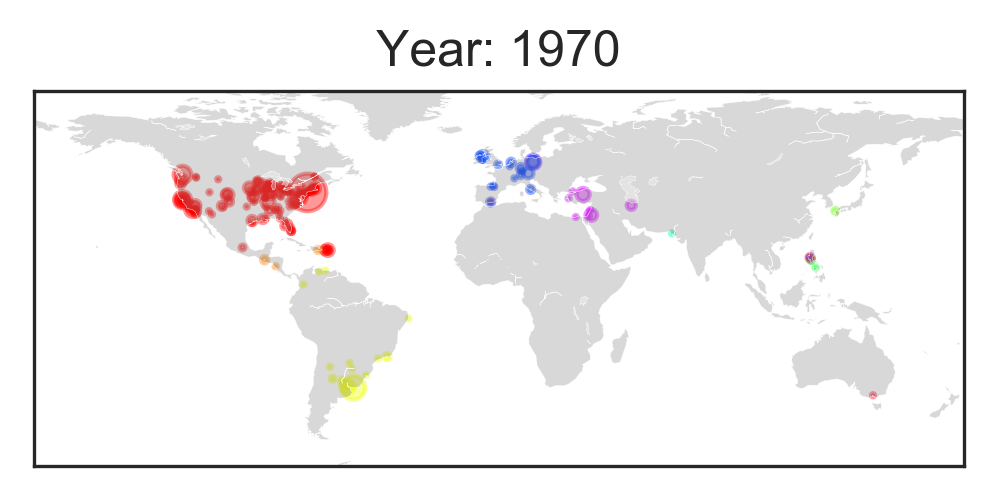

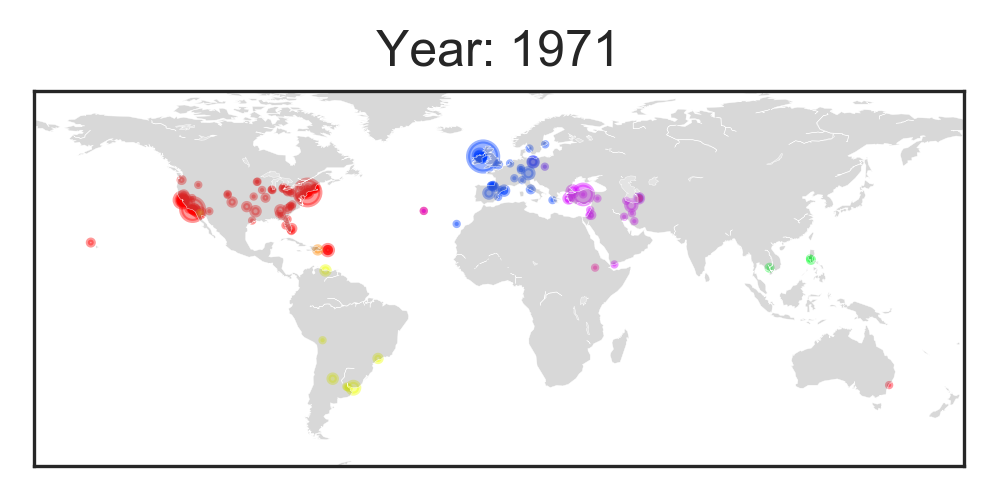

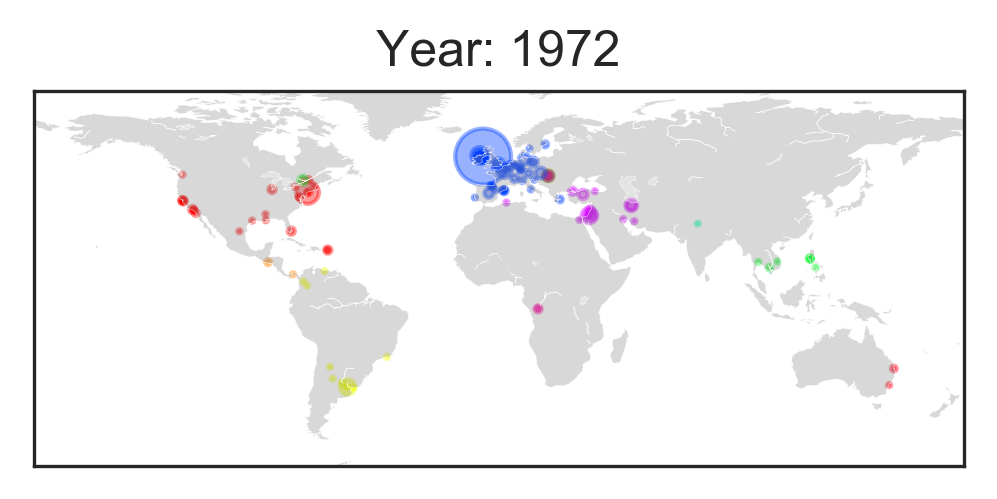

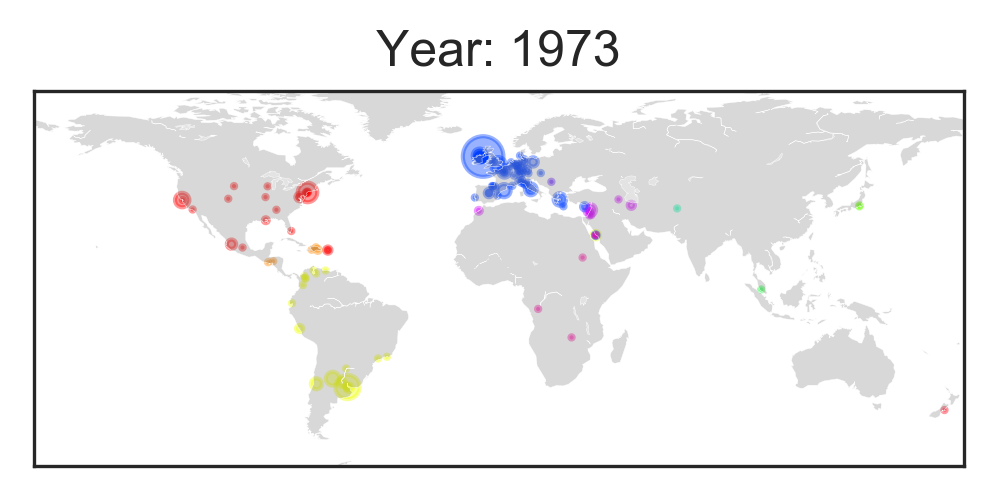

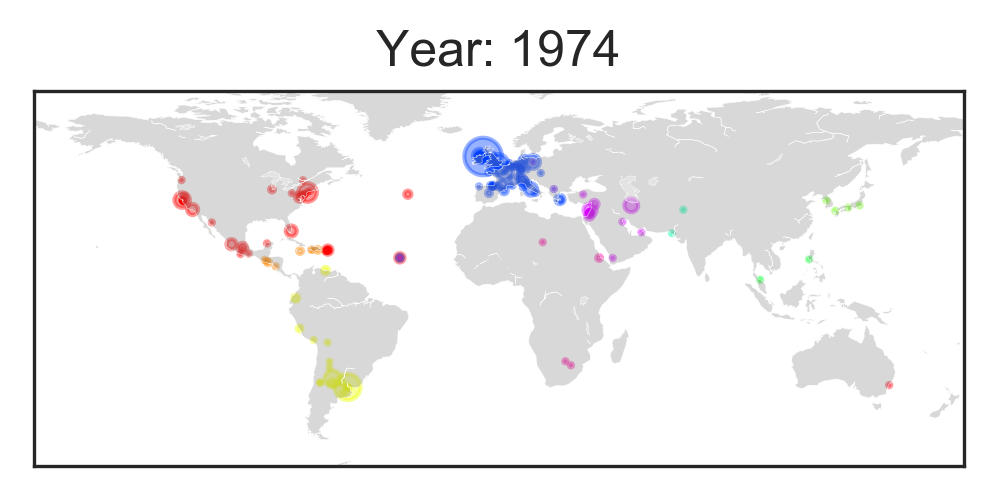

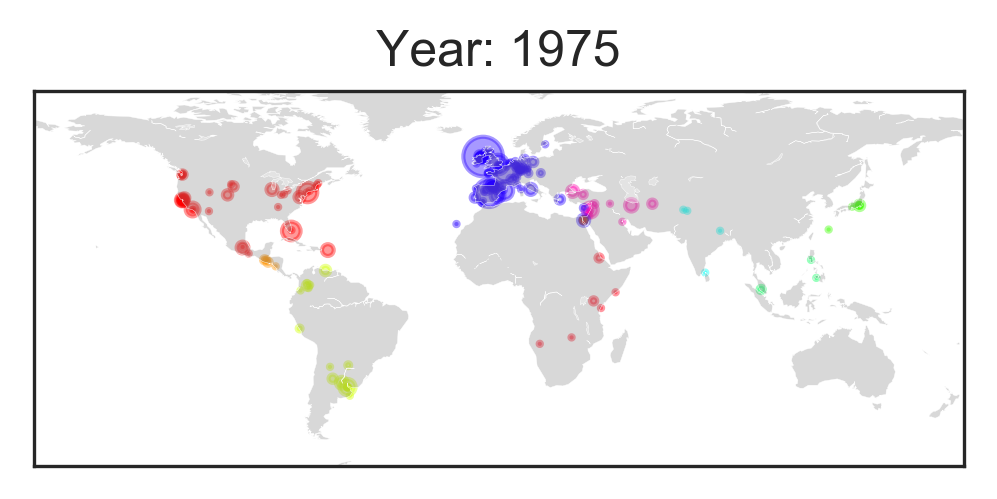

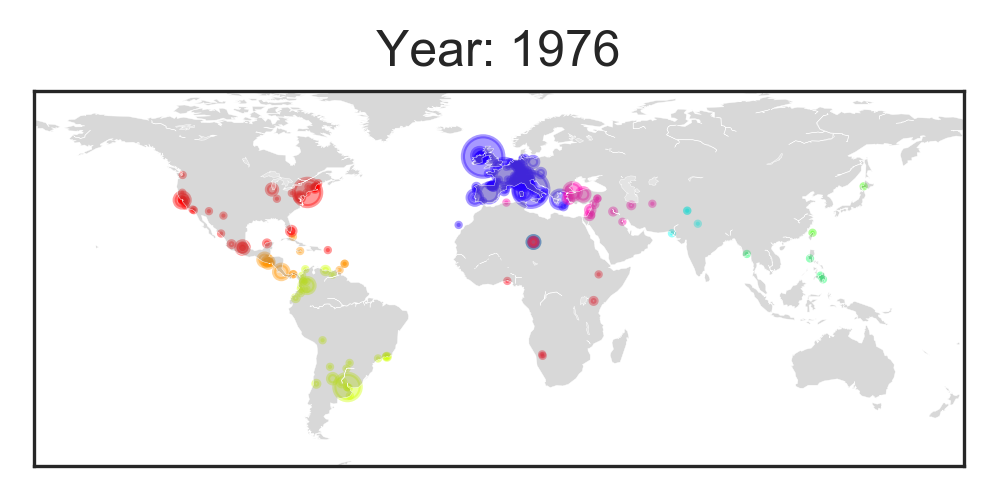

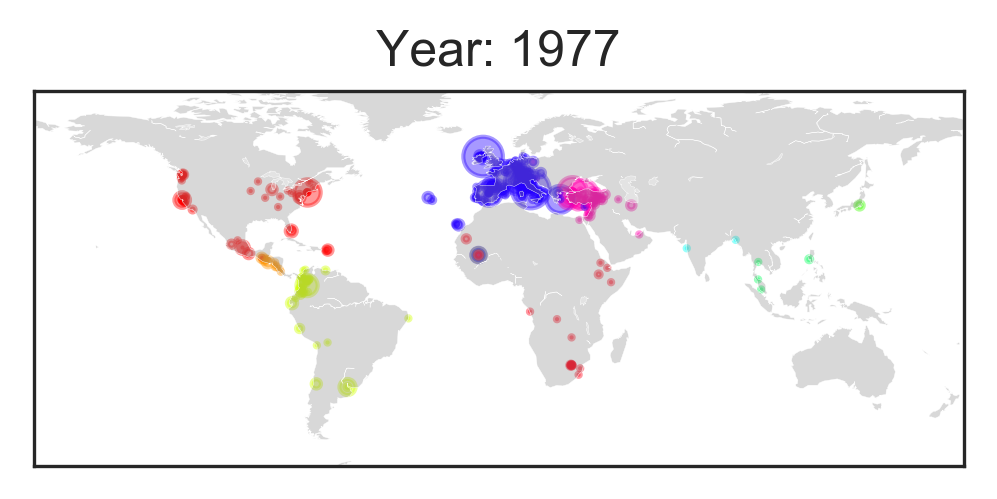

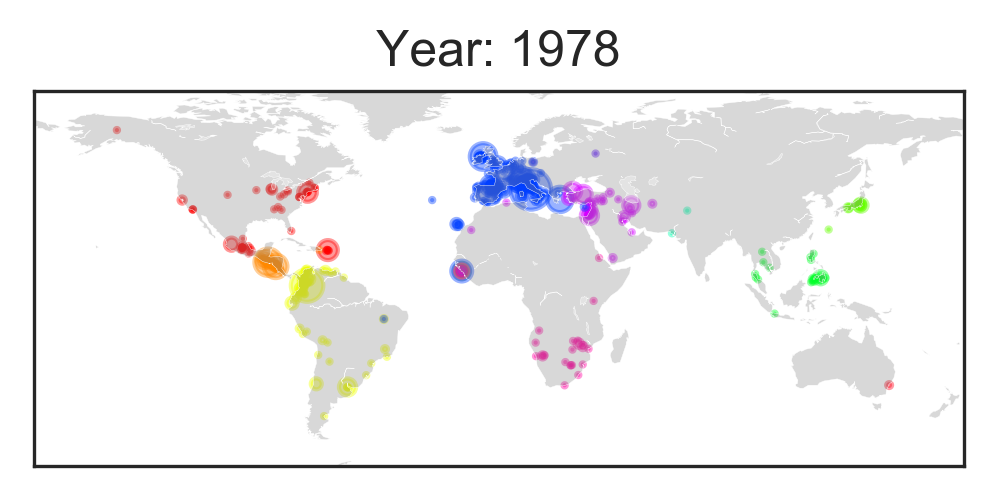

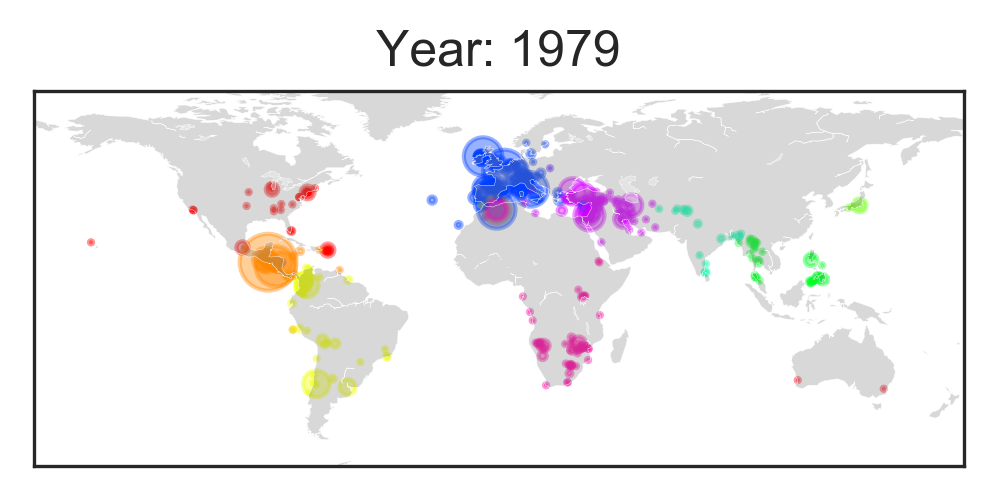

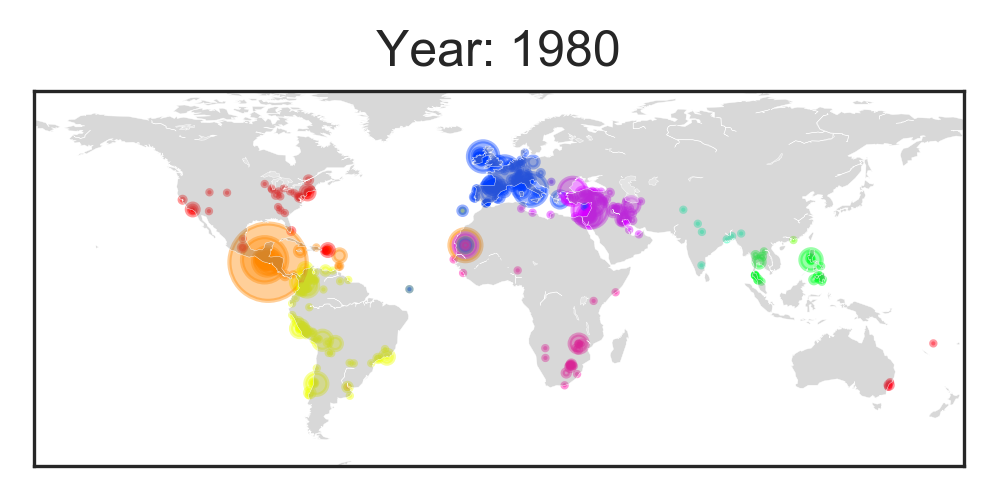

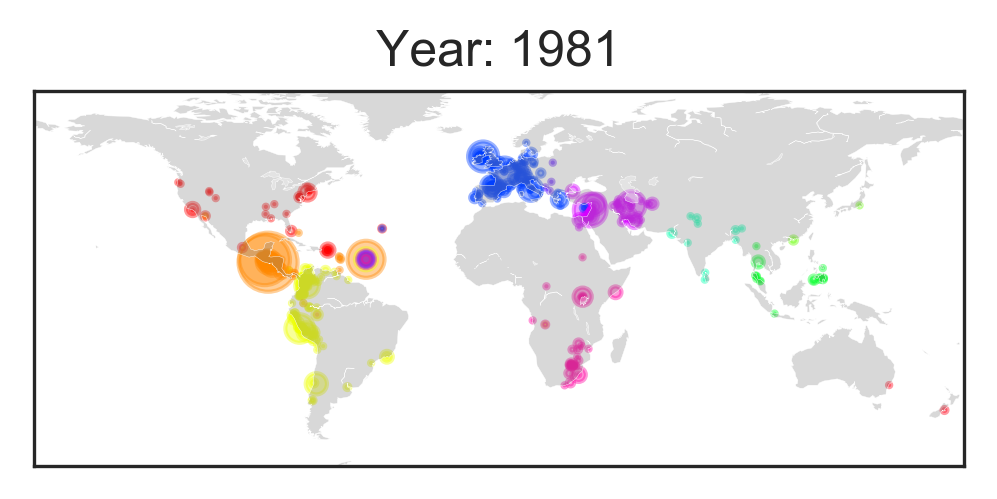

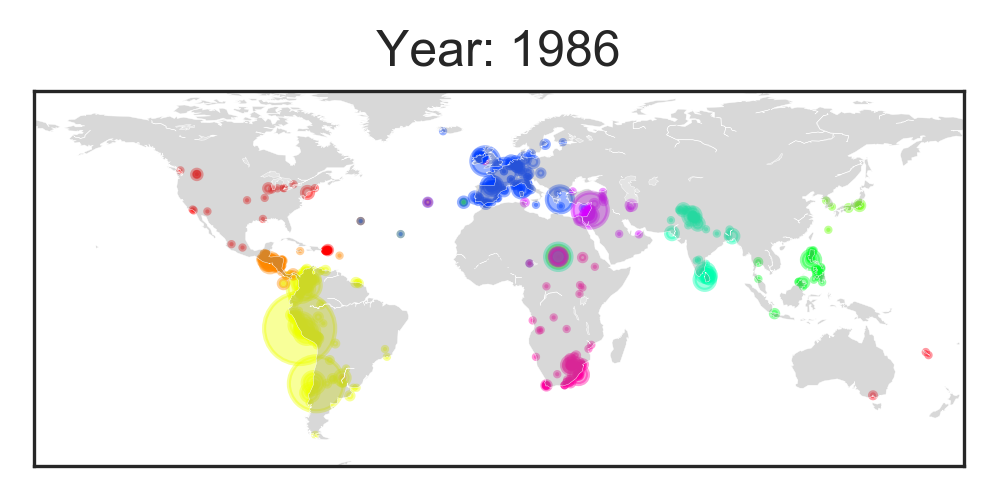

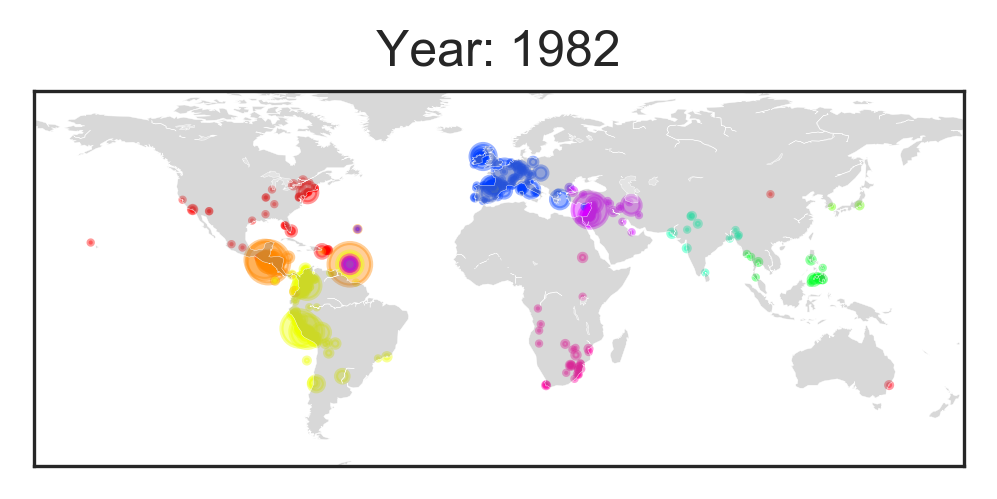

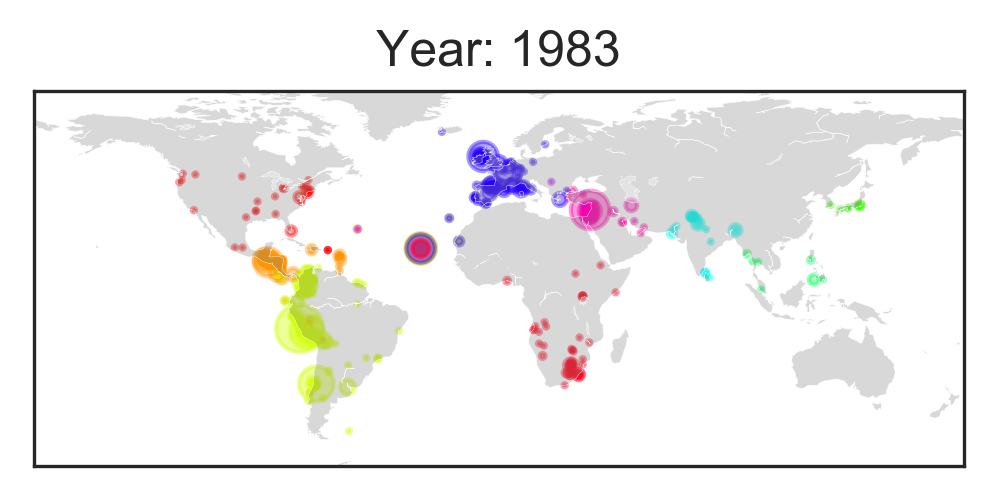

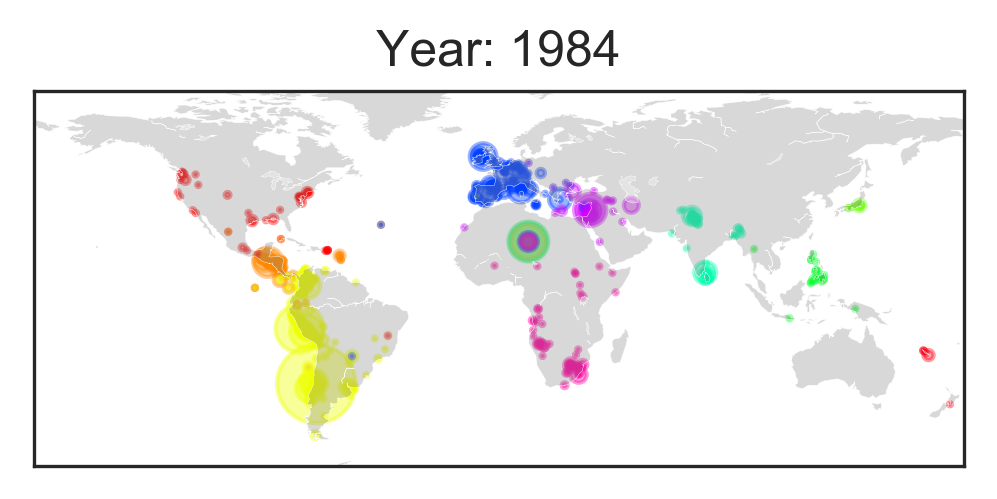

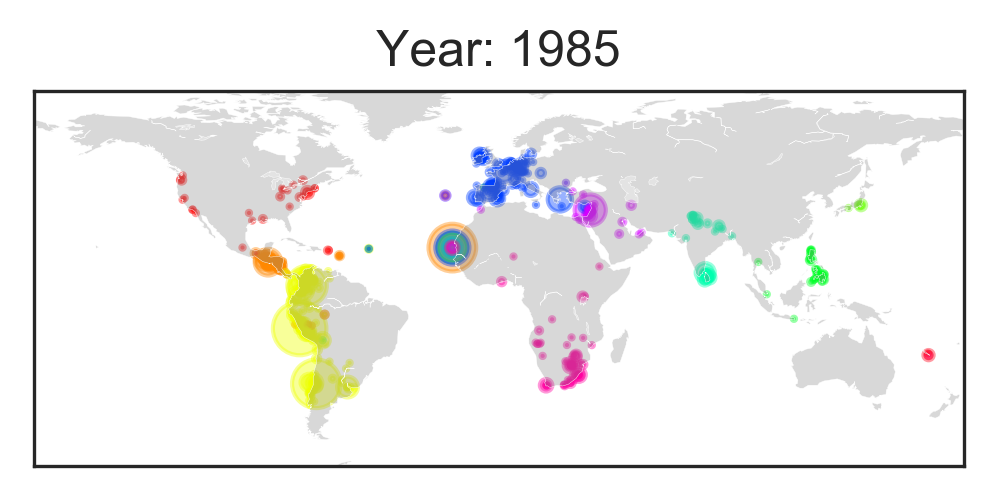

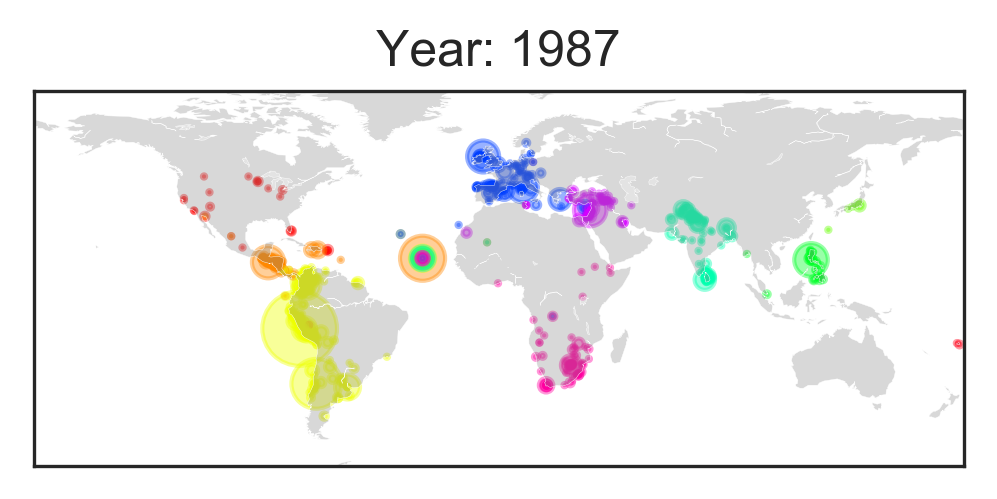

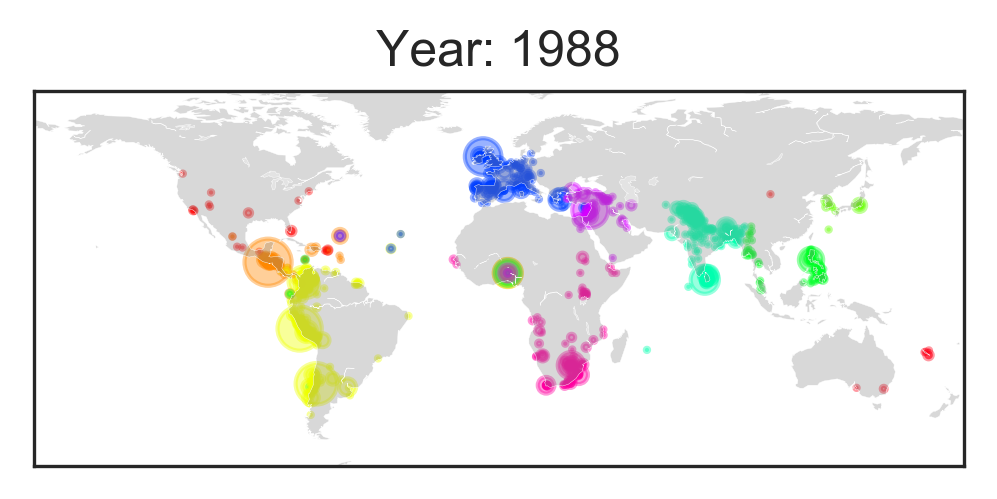

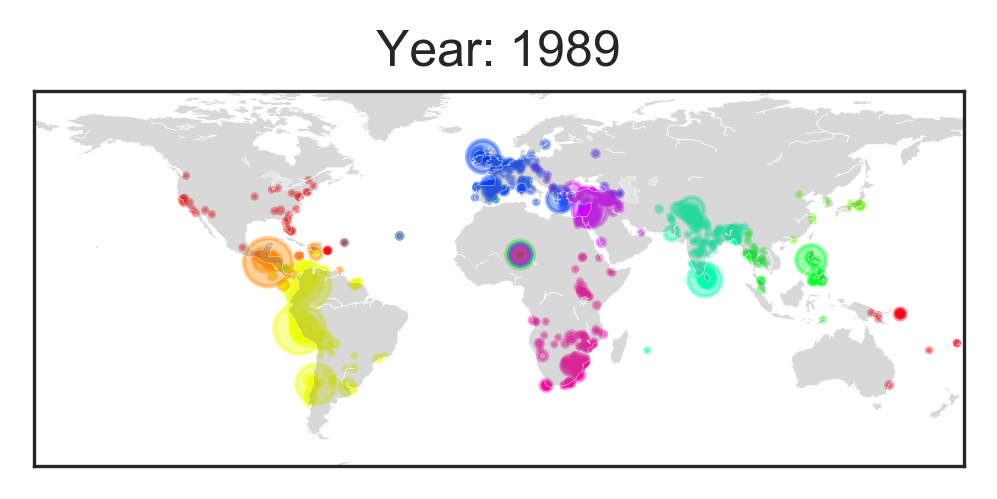

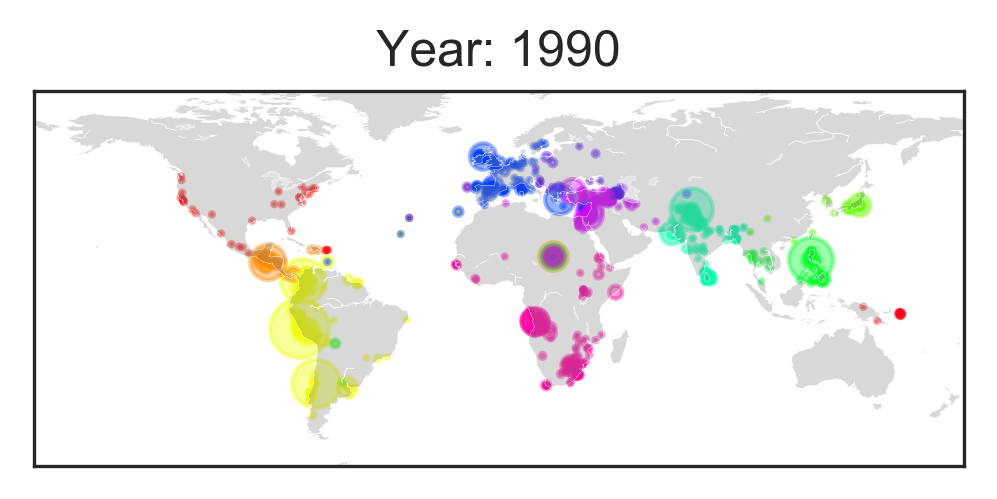

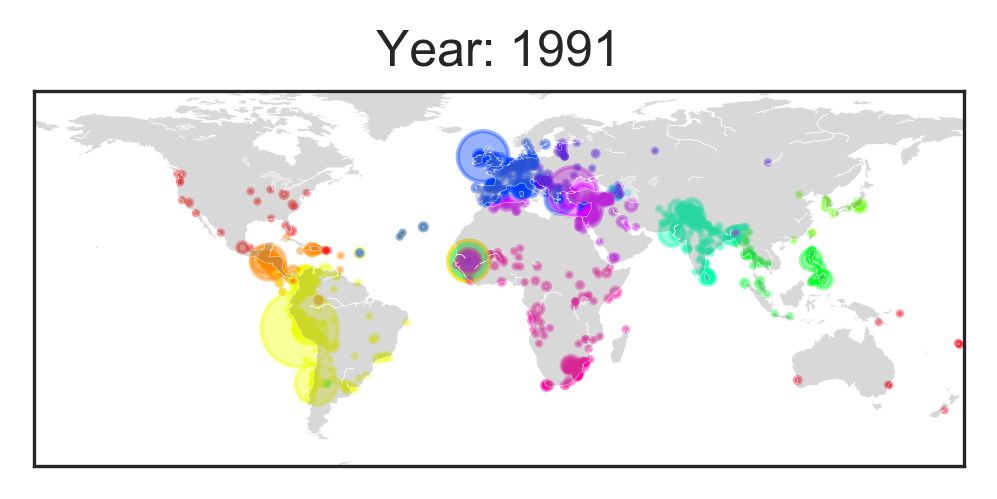

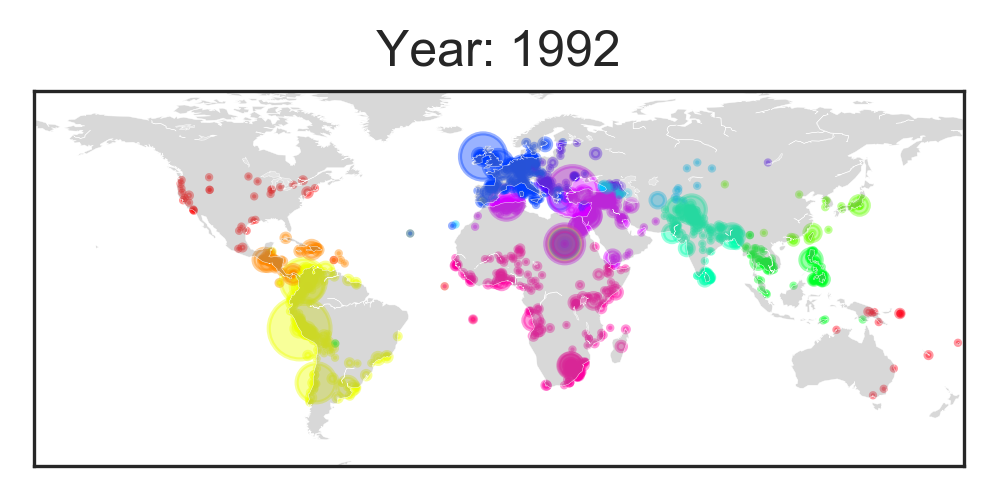

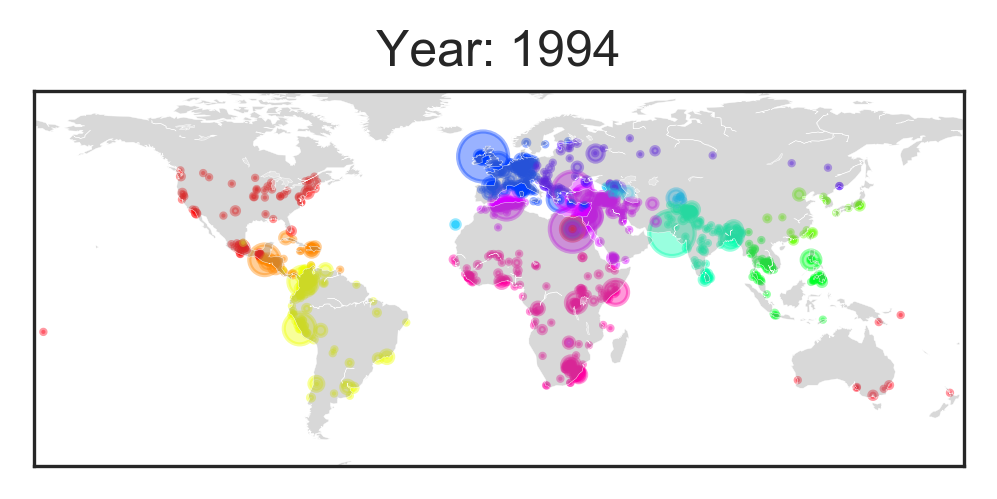

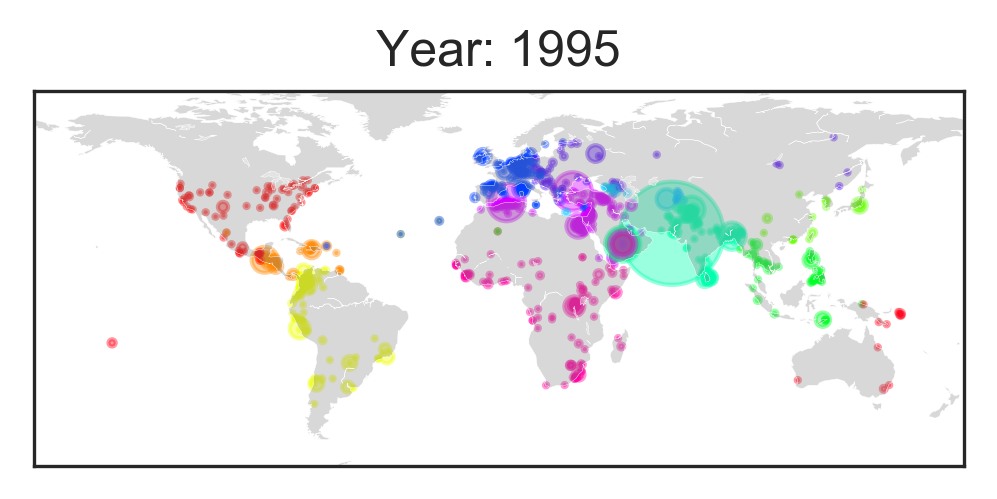

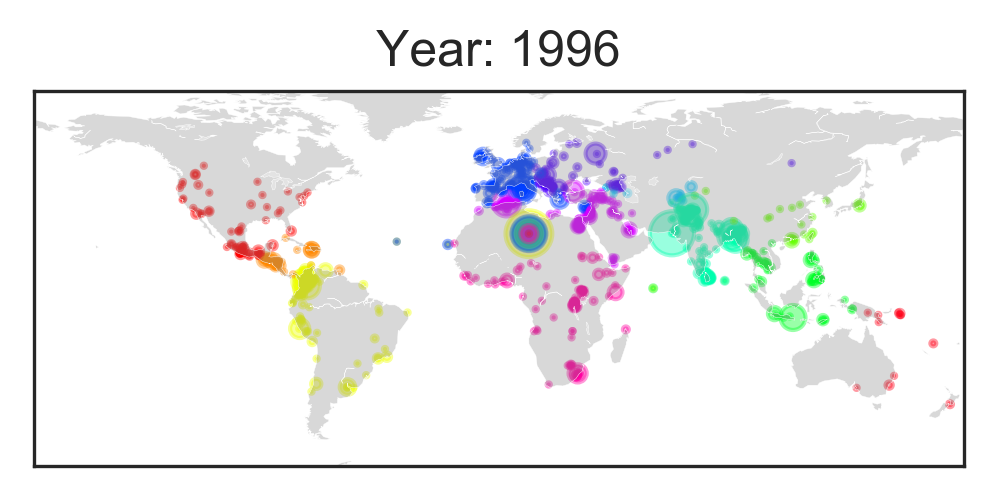

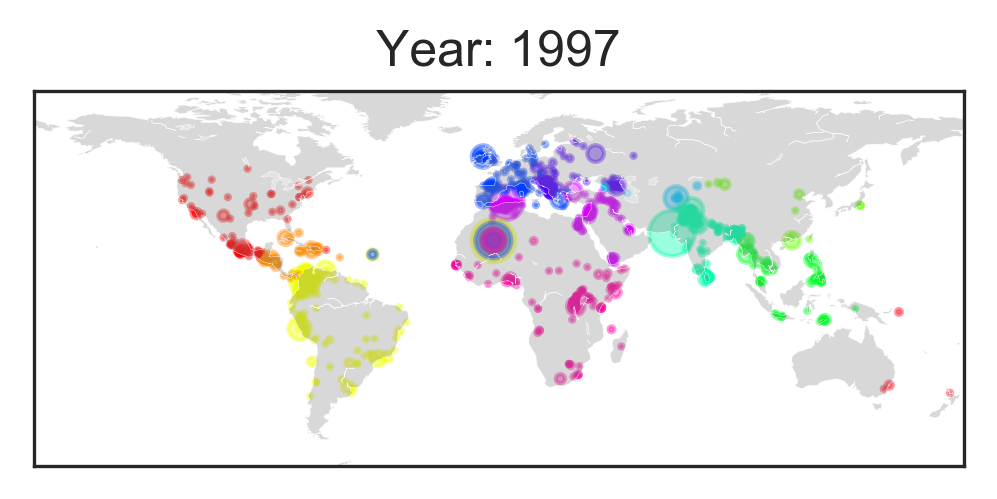

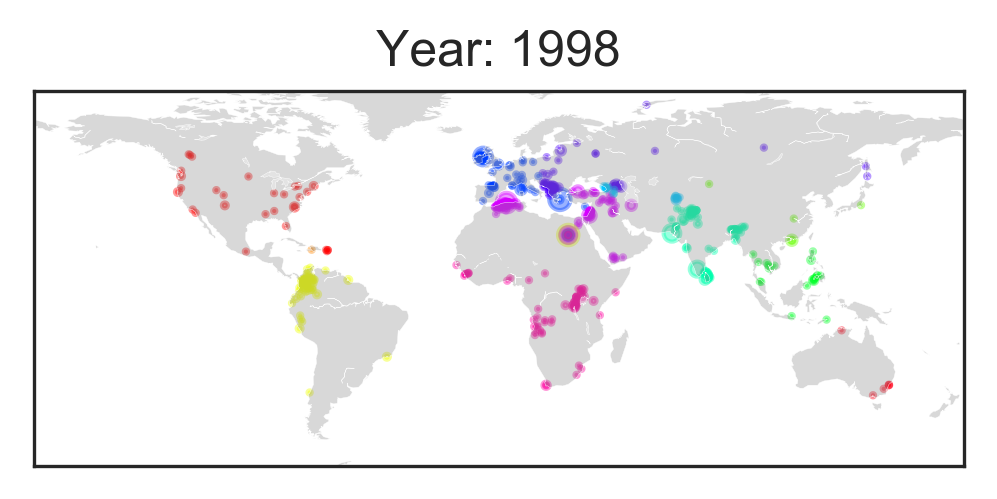

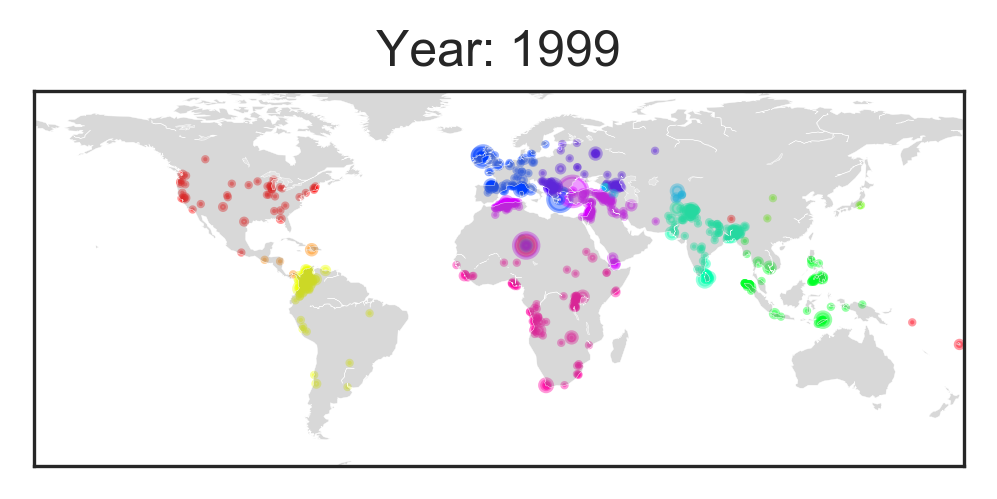

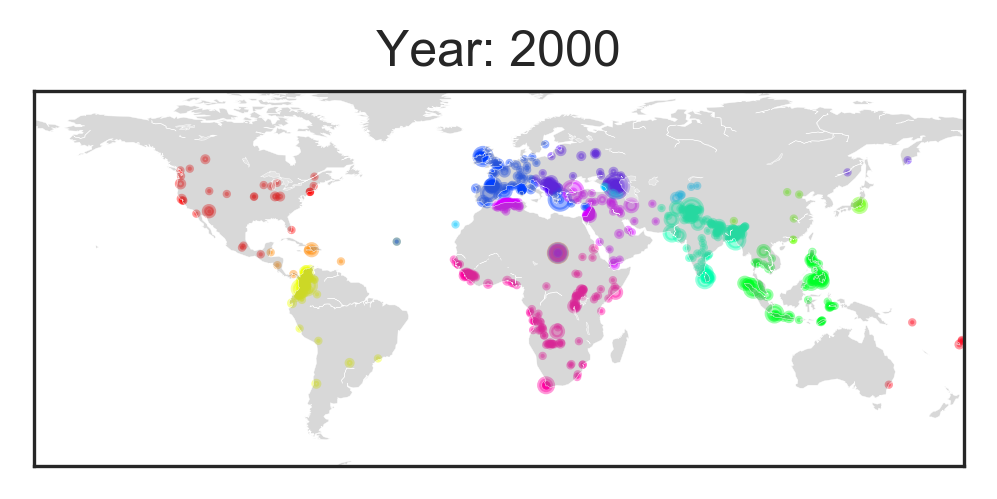

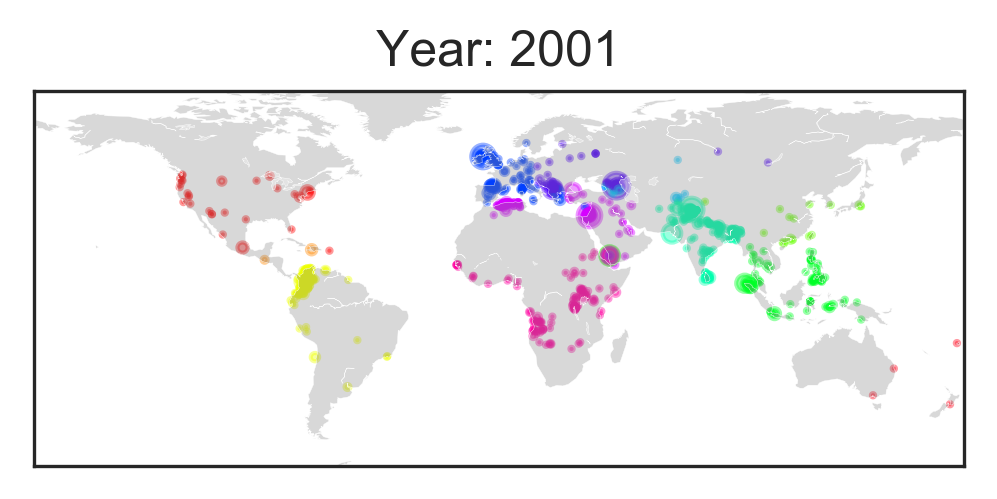

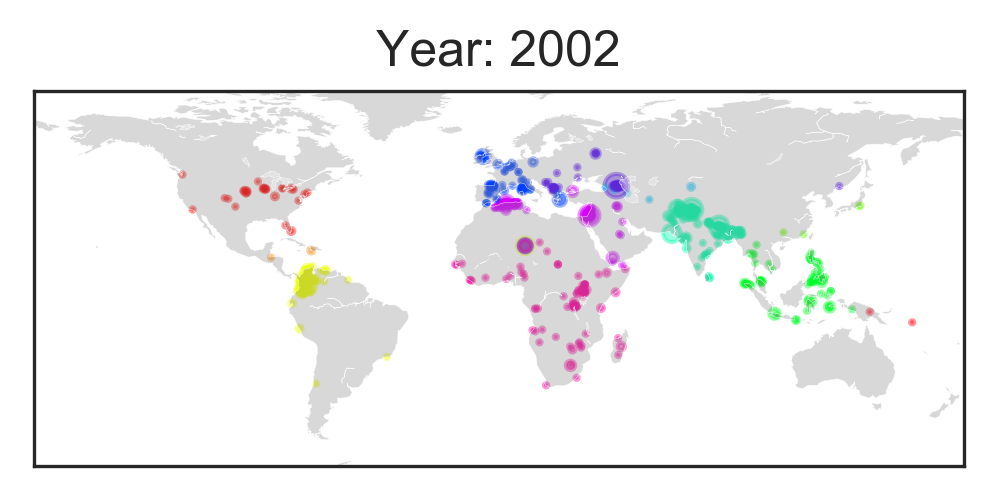

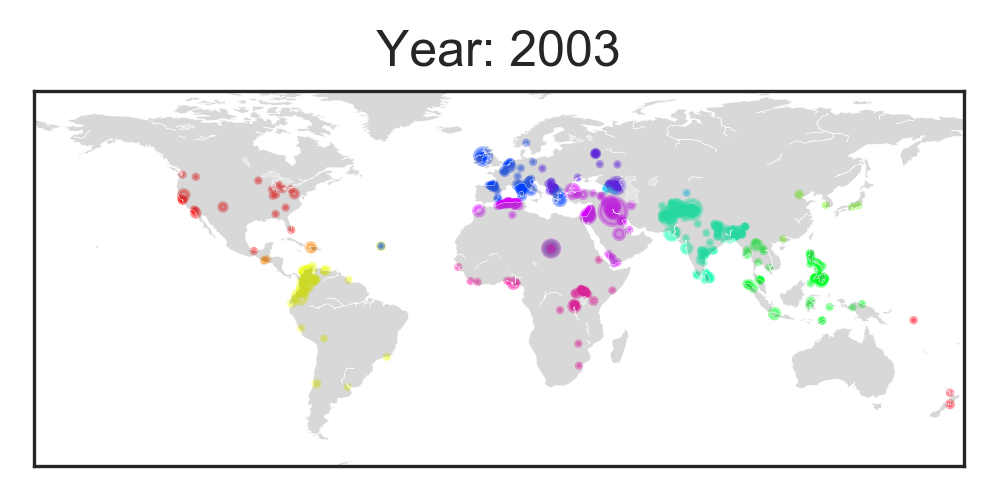

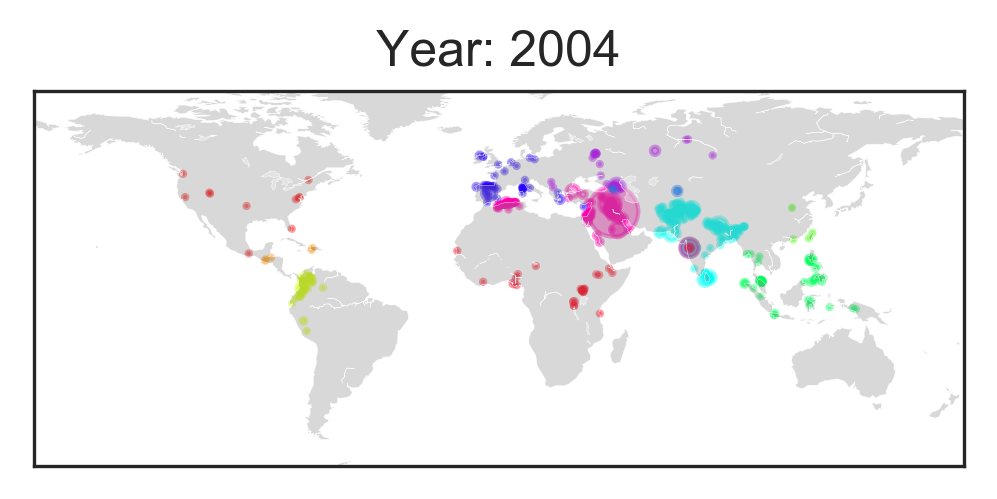

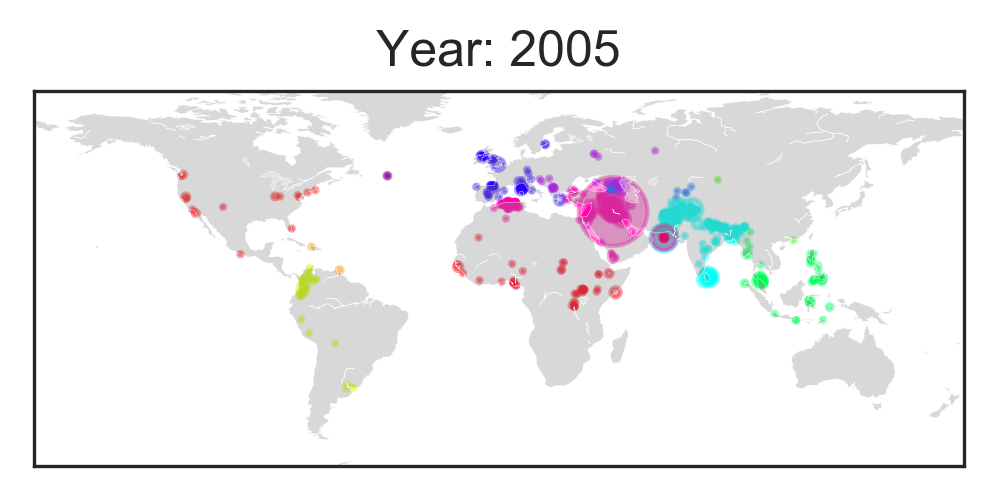

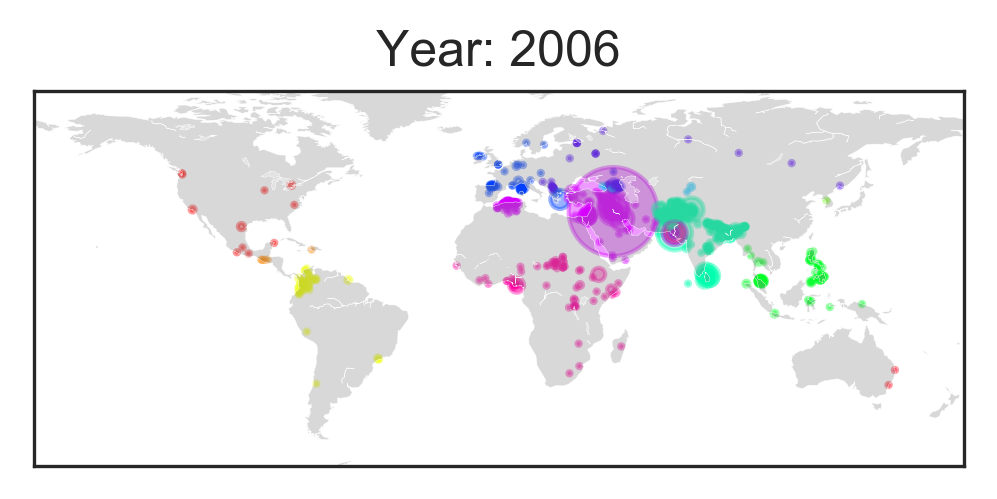

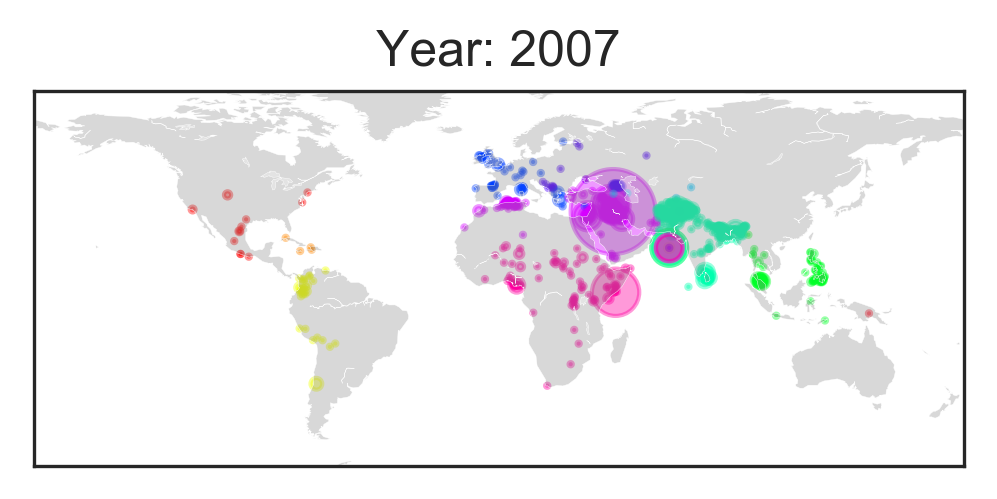

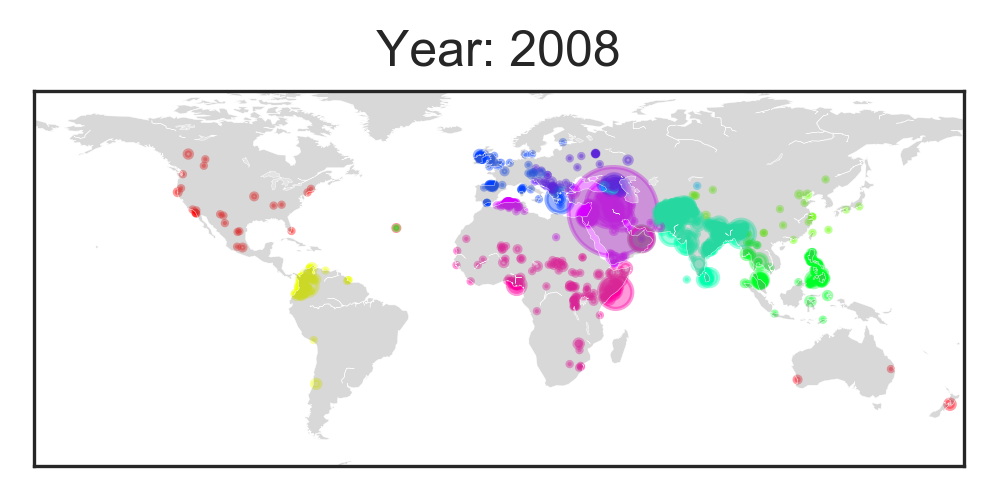

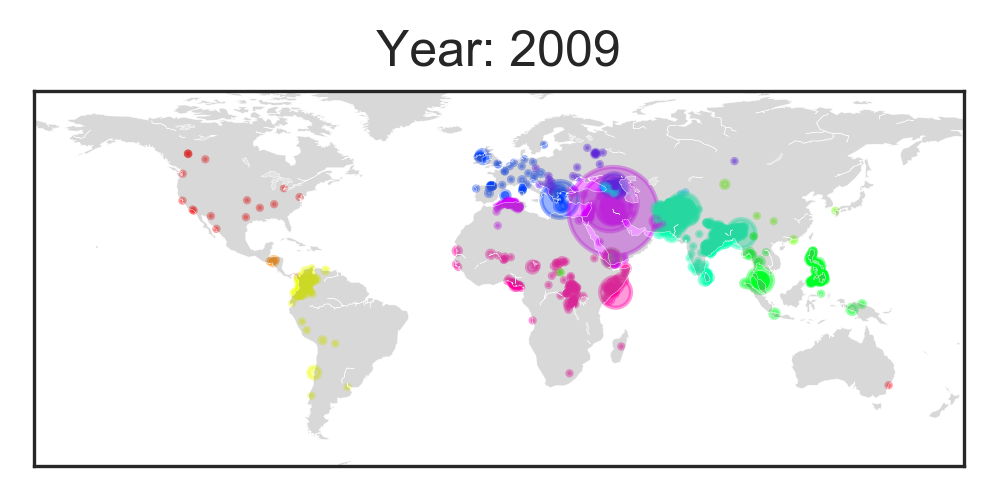

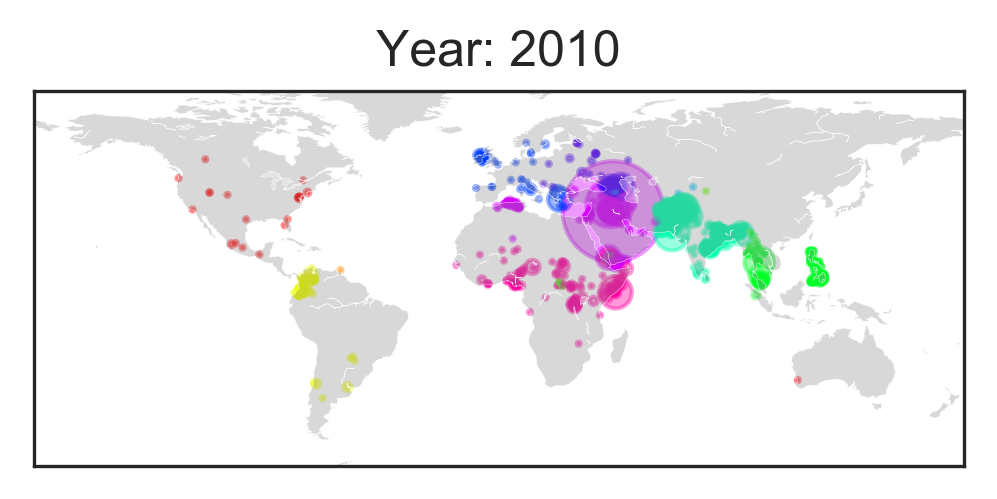

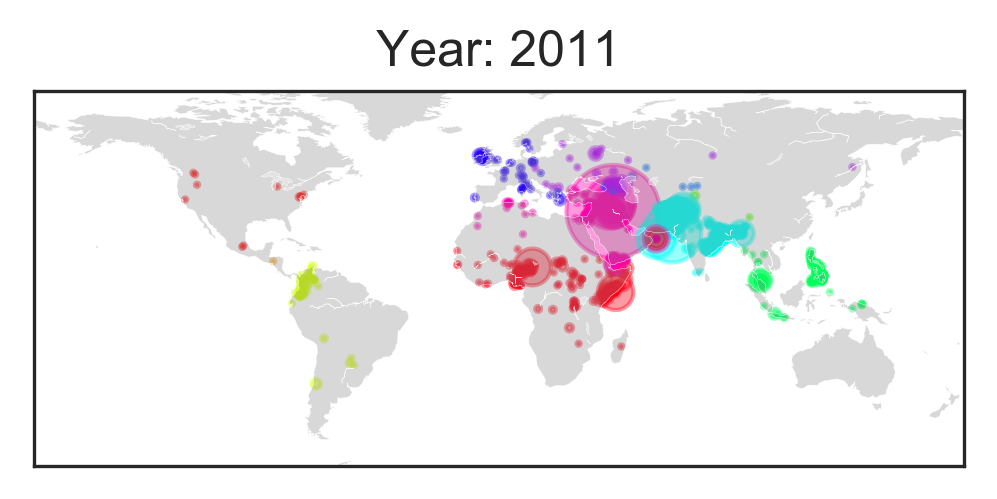

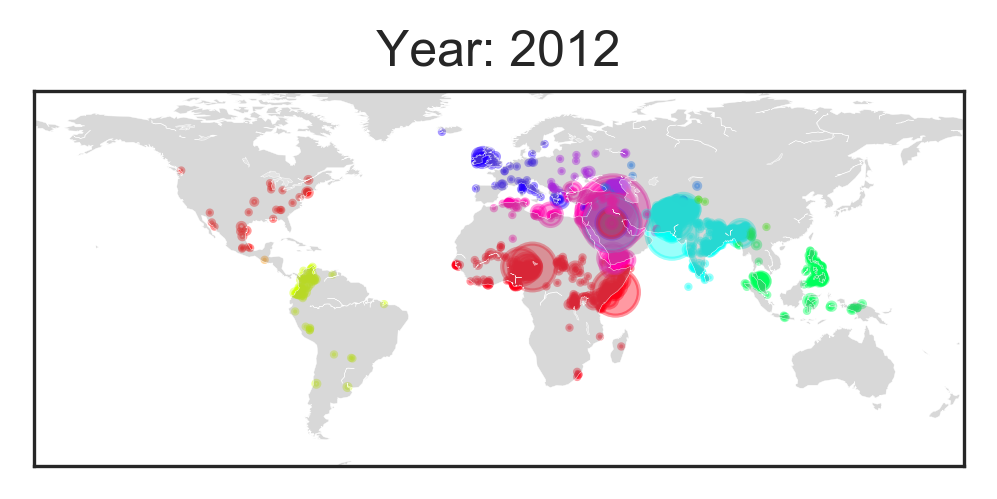

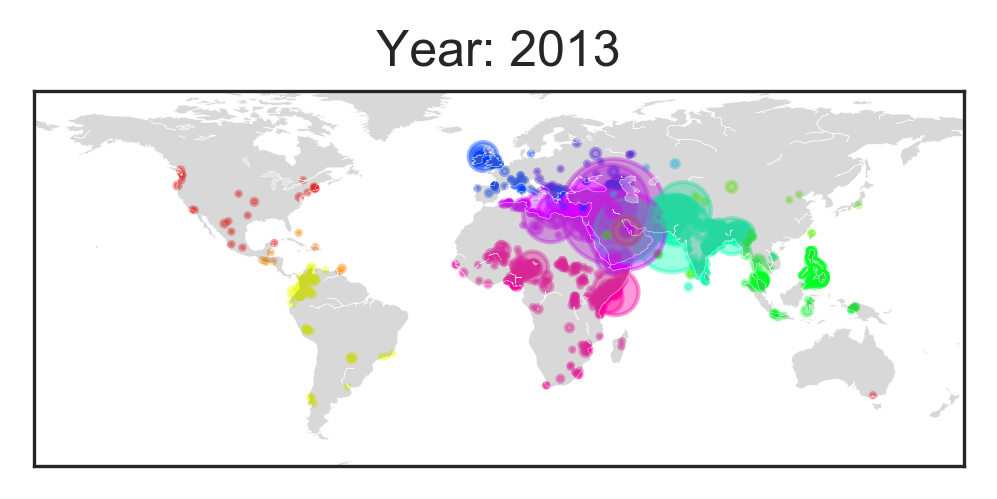

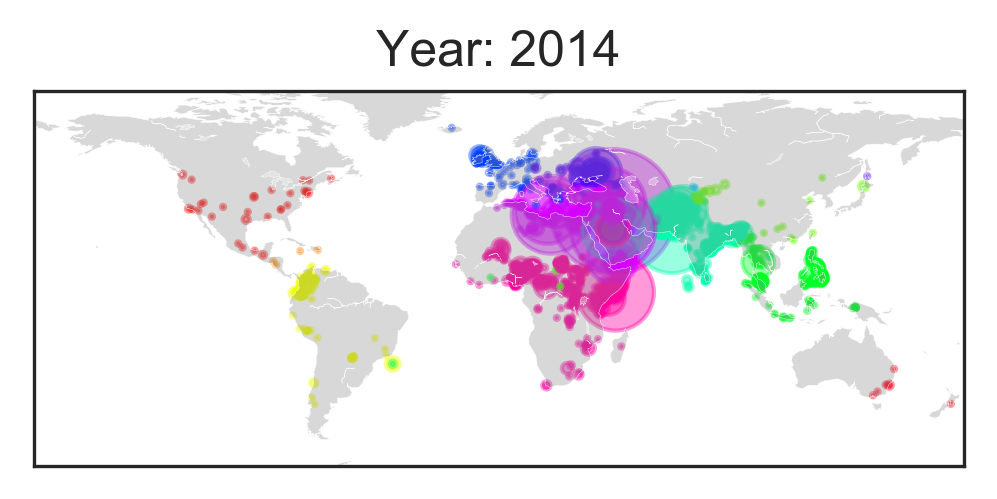

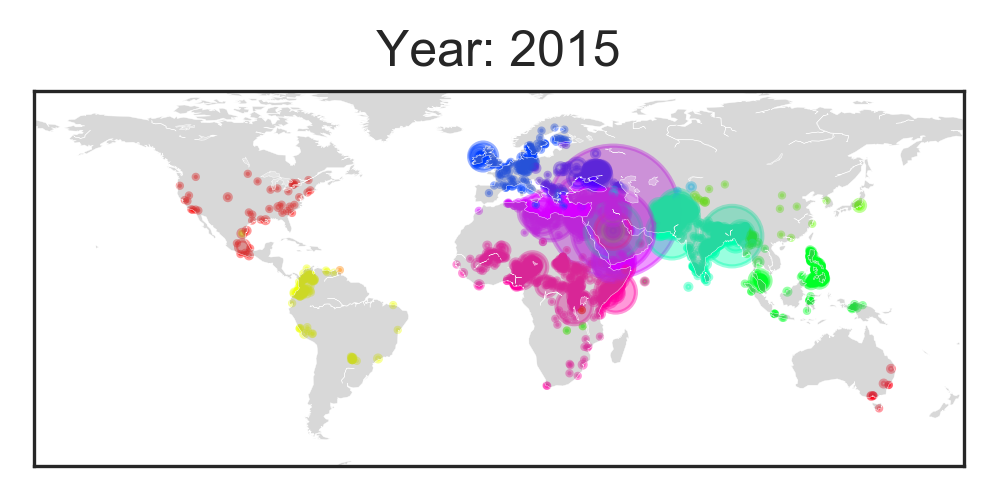

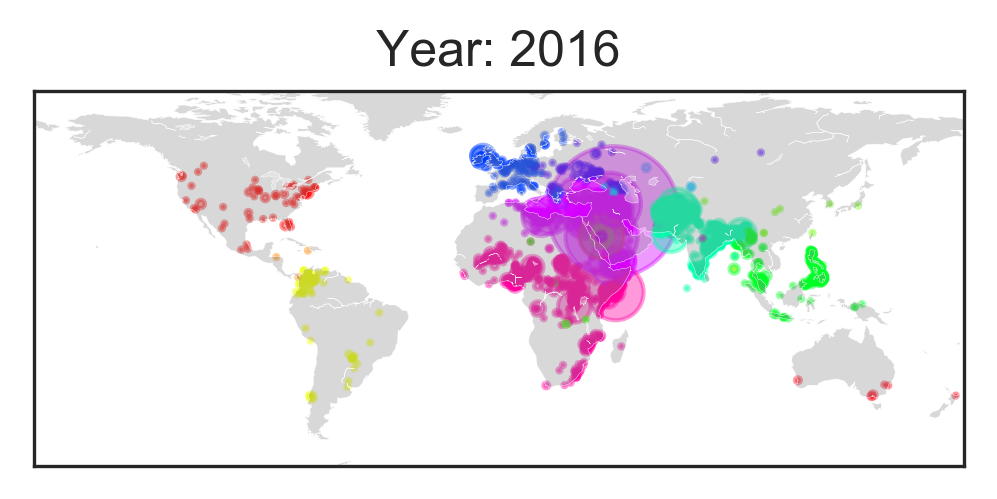

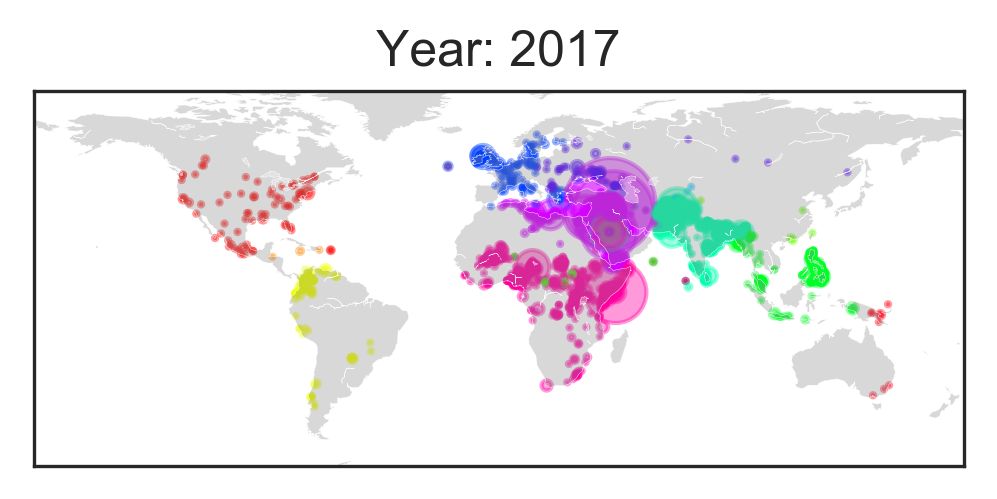

In [2]:
#Read in the Data
data = pd.read_csv('global_terrorism_db.csv')

# For each year:
for i in data.iyear.unique():
    # Set the dimension of the figure
    my_dpi=300
    plt.figure(figsize=(1200/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Get the data
    tmp=data[data['iyear'] == i]

    d = tmp.groupby(["city"], as_index=False)[["latitude","longitude"]].mean()

    d2 = pd.DataFrame(tmp.groupby(['region','city'])['city'].count())
    d2.columns = ['count']
    d2.reset_index(inplace=True)

    merged=d.merge(d2, on = 'city')

    # Make the background map
    m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
    m.fillcontinents(color='grey', alpha=0.3)
    m.drawcoastlines(linewidth=0.1, color="white")

    # Add a point per position
    m.scatter(merged['longitude'],
              merged['latitude'], 
              s=merged['count'], 
              alpha=0.4,
              c=merged['region'],
              cmap="hsv")

    #Add Plot Titles
    plt.title("Year: "+str(i) )

#     #Save Image
#     filename='GTD_BubbleAnimation_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)
#     plt.gca()

# Total for All Time (1970-2017)

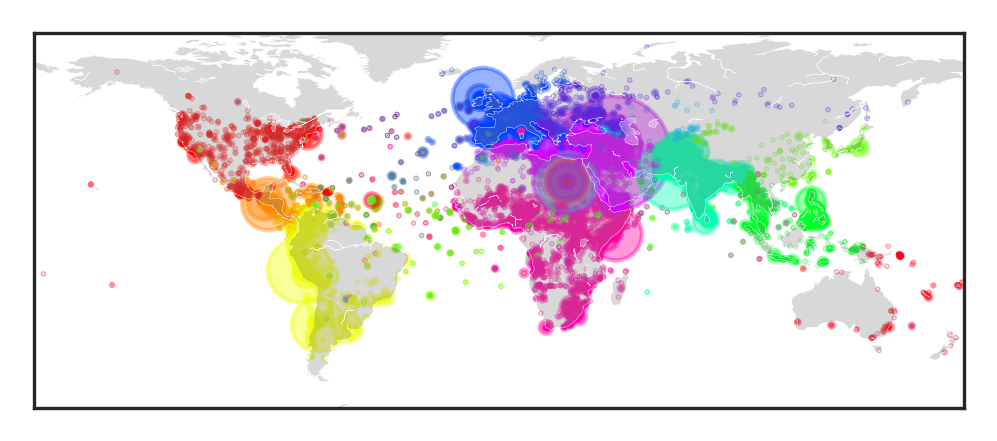

In [7]:
#Read in the Data
data = pd.read_csv('global_terrorism_db.csv')

# Set the dimension of the figure
my_dpi=300
plt.figure(figsize=(1200/my_dpi, 1000/my_dpi), dpi=my_dpi)


d = data.groupby(["city"], as_index=False)[["latitude","longitude"]].mean()

d2 = pd.DataFrame(data.groupby(['region','city'])['city'].count())
d2.columns = ['count']
d2.reset_index(inplace=True)

merged=d.merge(d2, on = 'city')

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position
m.scatter(merged['longitude'],
          merged['latitude'], 
          s=merged['count']/10, 
          alpha=0.4,
          c=merged['region'],
          cmap="hsv")

# #Add Plot Titles
# plt.title("Year: "+str(i) )

#     #Save Image
#     filename='GTD_BubbleAnimation_step'+str(i)+'.png'
#     plt.savefig(filename, dpi=300)
#     plt.gca()